In [2]:
import numpy as np
import pickle
import cv2
import tensorflow as tf
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras import backend as k
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Dropout 
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator 
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [3]:
EPOCHS = 20
BS = 32
image_size=256
channels=3
directory_root =  "C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/imgs/train/"

In [4]:
dataset=tf.keras.utils.image_dataset_from_directory(
    directory_root,
    shuffle=True,
    batch_size=BS,
    image_size=(image_size, image_size),
)

Found 22424 files belonging to 10 classes.


In [5]:
class_names=dataset.class_names
class_names

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [6]:
def get_dataset_size(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(dataset)
    if shuffle:
        ds=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(train_split *ds_size)
    val_size=int(val_split*ds_size)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [7]:
train_ds,val_ds,test_ds=get_dataset_size(dataset)

In [8]:
len(val_ds)

70

In [9]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(image_size,image_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
import tensorflow as tf
from tensorflow.keras import layers

input_shape = (BS, image_size, image_size, channels)
n_classes = 17

model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history=model.fit(
    train_ds,
    epochs=20,
    batch_size=BS,   
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20


560/560 [==============================] - 2596s 4s/step - loss: 2.0941 - accuracy: 0.2256 - val_loss: 1.7332 - val_accuracy: 0.3562
Epoch 2/20
560/560 [==============================] - 980s 2s/step - loss: 1.4873 - accuracy: 0.4701 - val_loss: 1.1605 - val_accuracy: 0.5862
Epoch 3/20
560/560 [==============================] - 1017s 2s/step - loss: 1.1416 - accuracy: 0.6036 - val_loss: 0.9692 - val_accuracy: 0.6652
Epoch 4/20
560/560 [==============================] - 994s 2s/step - loss: 0.9362 - accuracy: 0.6775 - val_loss: 0.7708 - val_accuracy: 0.7518
Epoch 5/20
560/560 [==============================] - 1004s 2s/step - loss: 0.7722 - accuracy: 0.7382 - val_loss: 0.6493 - val_accuracy: 0.7781
Epoch 6/20
560/560 [==============================] - 3821s 7s/step - loss: 0.6771 - accuracy: 0.7731 - val_loss: 0.5998 - val_accuracy: 0.8009
Epoch 7/20
560/560 [==============================] - 1162s 2s/step - loss: 0.5886 - accuracy: 0.8042 - val_loss: 0.4601 - val_accuracy:

In [16]:
scores=model.evaluate(test_ds)


: 

In [ ]:
scores

[0.42379769682884216, 0.8656927347183228]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 526}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['accuracy'])

15

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Accuracy')

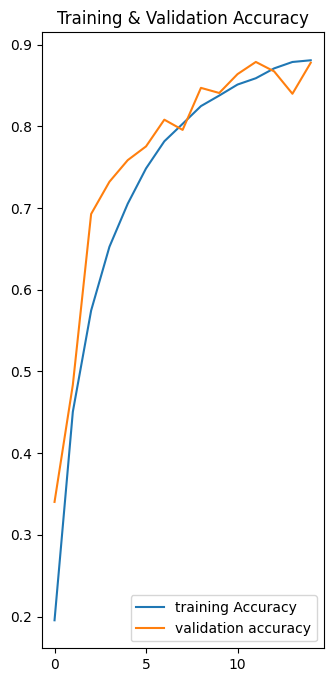

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

First image to predict
First image Actual label name : c1
1/1 [==============================] - 1s 1s/step
[5.8166768e-02 9.3087512e-01 8.6485041e-09 1.8811645e-03 3.9581864e-06
 2.1378155e-05 2.8829365e-06 4.2589372e-03 1.4875843e-03 3.3021274e-03
 2.4636224e-15 5.6495953e-17 2.8058036e-17 1.0834216e-19 2.9286803e-17
 2.0862446e-22 2.3146965e-21]
1
Prediction label:  c1


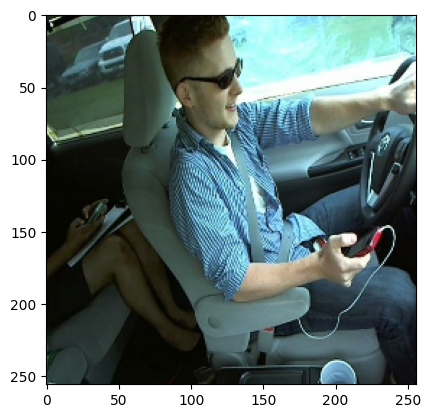

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
    first_image= images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("First image to predict")
    plt.imshow(first_image)
    print("First image Actual label name :", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("Prediction label: ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) 
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 57ms/step


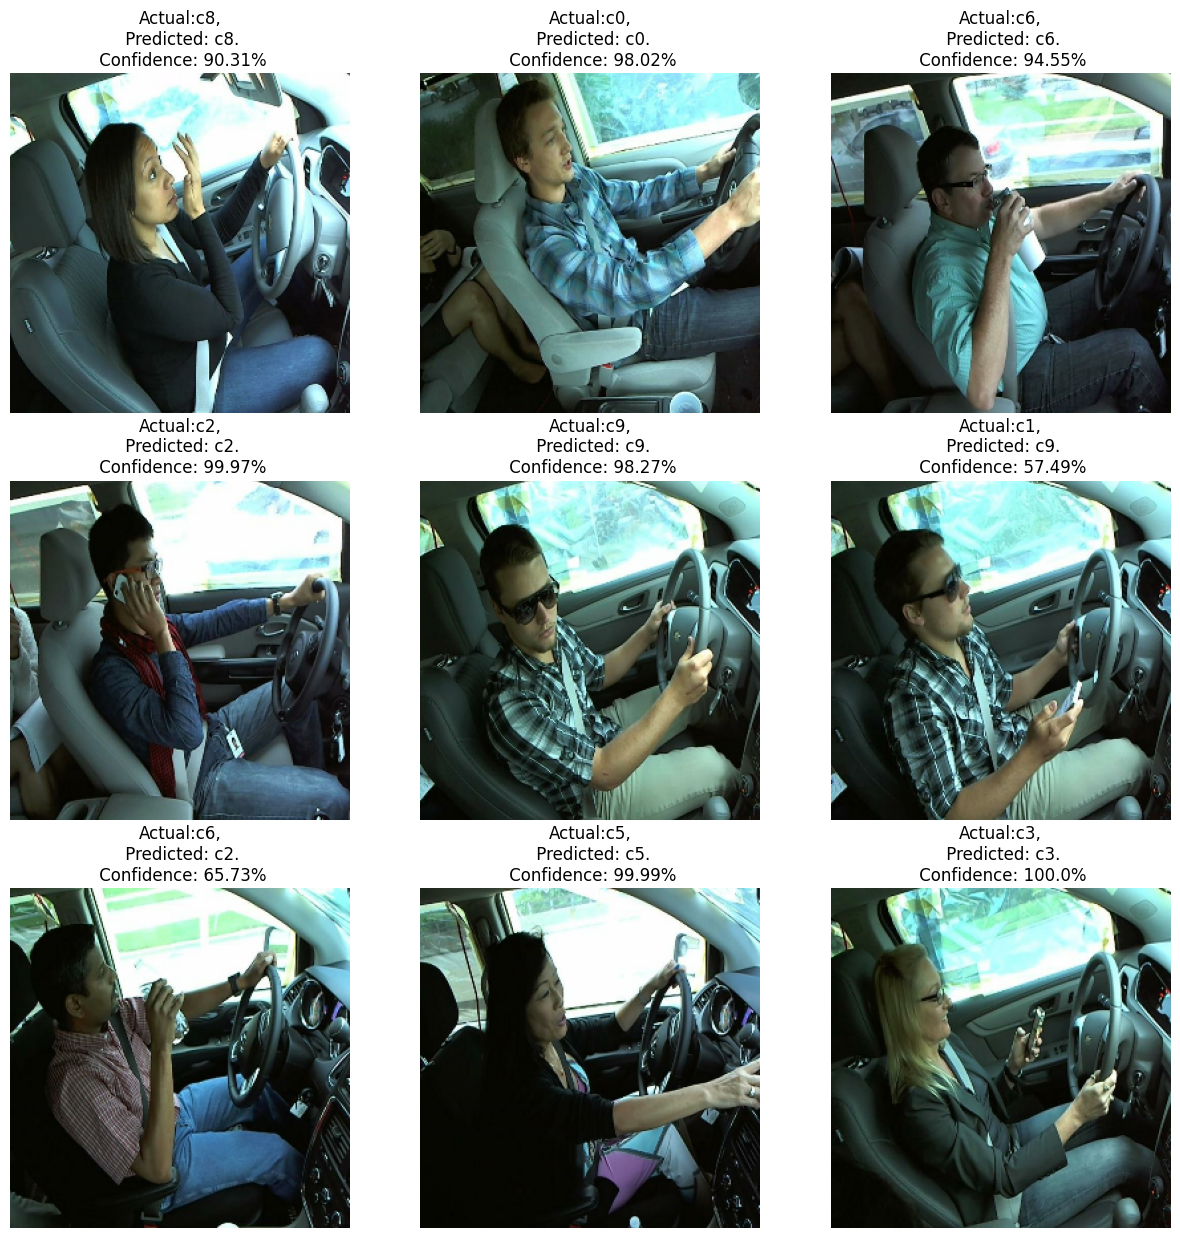

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
# Save the model as HDF5 file
model_hdf5_path = "C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/model/CNN_model.h5"
model.save(model_hdf5_path)
print("Model saved as HDF5 file:", model_hdf5_path)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as HDF5 file: C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/model/model.h5


In [ ]:
# Load the model from HD
from tensorflow.keras.models import load_model 
import tensorflow as tf
import numpy as np
loaded_model_hdf5 = load_model("C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/model/CNN_model.h5")
image_size=256

class_names = {0: "Safe Driving", 1: "Texting - Right Hand", 2: "Talking on the Phone - Right",
                3: "Texting - Left Hand", 4: "Talking on the Phone - Left", 5: "Operating the Radio",
                6: "Drinking", 7: "Reaching Behind", 8: "Hair and Makeup", 9: "Talking to Passenger"}

# Test the loaded model with a sample image
sample_image_path = "C:/Users/Lenovo/Desktop/Driver-Distraction-Detection/Training Notebooks/imgs/train/c5/img_63.jpg" # Provide the path to your sample image
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(image_size, image_size))
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)

# Predict using the model loaded from HDF5 file
predictions_hdf5 = loaded_model_hdf5.predict(sample_image)
predicted_class_hdf5 = class_names[np.argmax(predictions_hdf5[0])]
print("Predicted class (HDF5):", predicted_class_hdf5)


1/1 [==============================] - 0s 369ms/step
Predicted class (HDF5): Operating the Radio
